In [1]:
# referecence: NCBI website
%pylab inline
from bioservices import EUtils
from easydev import AttrDict

Populating the interactive namespace from numpy and matplotlib


/home/cokelaer/miniconda3/envs/sequana/lib/python3.7/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['re', 'plt', 'mpl', 'sys', 'np']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [2]:
e = EUtils()

In [3]:
report = e.ESearch('nuccore', term='A/chicken/Hong+Kong/915/97+OR+A/chicken/Hong+Kong/915/1997', usehistory='y')

In [4]:
report = AttrDict(**report)

In [5]:
import pandas as pd
summary = e.ESummary('nuccore', WebEnv=report.webenv, query_key=report.querykey)


In [6]:
uids = summary['uids']

In [7]:
# here you need a little bit of introspection but can easily obtain the accessions, descriptions, ids
accession = [summary[s]['accessionversion'] for s in uids]
description = [summary[s]['organism'] for s in uids]
id_ = [summary[s]['extra'] for s in uids]
taxid = [summary[s]['taxid'] for s in uids]


pd.DataFrame({'accession':accession, 'description': description, 'ids':id_,'taxid':taxid})
    

,accession,description,ids,taxid
0,AF098594.1,Influenza A virus (A/chicken/Hong Kong/915/97(...,gi|6048875|gb|AF098594.1|,100838
1,AF098581.1,Influenza A virus (A/chicken/Hong Kong/915/97(...,gi|6048849|gb|AF098581.1|,100838
2,AF098550.1,Influenza A virus (A/chicken/Hong Kong/915/97(...,gi|6048770|gb|AF098550.1|,100838
3,AF098564.1,Influenza A virus (A/chicken/Hong Kong/915/97(...,gi|6048802|gb|AF098564.1|,100838
4,AF098620.1,Influenza A virus (A/chicken/Hong Kong/915/97(...,gi|6048927|gb|AF098620.1|,100838
5,AF098608.1,Influenza A virus (A/chicken/Hong Kong/915/97(...,gi|6048903|gb|AF098608.1|,100838
6,AF098573.1,Influenza A virus (A/chicken/Hong Kong/915/97(...,gi|6048829|gb|AF098573.1|,100838
7,AF046100.1,Influenza A virus (A/chicken/Hong Kong/915/199...,gi|3421265|gb|AF046100.1|,380304


In [8]:
sequence = e.EFetch('nuccore', uids[0], rettype='fasta', retmode='text', WebEnv=report.webenv, query_key=report.querykey)
sequence

b'>AF098594.1 Influenza A virus (A/Chicken/Hong Kong/915/97 (H5N1)) PB1 protein (PB1) gene, partial cds\nGTCAATCCGACTTTACTTTTCTTAAAAGTGCCAGCGCAAAATGCCATAAGTACCACATTCCCTTATACTG\nGAGATCCCCCATACAGCCATGGAACAGGAACAGGGTACACCATGGACACAGTCAACAGAACACATCAATA\nTTCAGAAAAAGGGAGGTGGACAACAAACACAGAGACCGGAGCACCCCAACTCAACCCTATTGATGGACCA\nTTACCTGAAGATAACGAGCCGAGCGGGTATGCACAGACAGATTGTGTATTGGAAGCAATGGCTTTCCTTG\nAAGAATCCCACCCAGGACTCTTTGAAAACTCATGTCTTGAAACGATGGAAGTTGTCCAGCAAACGAGAGT\nGGATAAGCTGACCCAAGGTCGCCAGACCTATGACTGGACATTGAACAGAAACCAGCCGGCTGCAACTGCT\nTTGGCCAACACCATAGAAGTATTCAGATCGAACGGTCTAACAGCCAATGAGTCAGGAAGGCTAATAGATT\nTCCTCAAGGACGTAGTGGAATCAATGGATAAGGAAGAAATGGAGATAACAACACATTTCCAGAGAAAGAG\nAAGAGTGAGGGACAACATGACCAAGAGAATGGTCACACAAAGAACAATAGGGAAAAAGAAGCAAAGGCTG\nACAAAAAAGAGCTACCTAATAAGAGCACTGACACTGAACACAATGACAAAAGATGCTGAAAGGGGAAAAT\nTGAAAAGGCGAGCAATTGCAACACCCGGAATGCAAATCAGAGGATTCGTGCACTTTGTCGAAGCACTAGC\nAAGGAGCATCTGTGAAAAACTTGAGCAATCTGGACTCCCCGTCGGAGGGAATGAGAAGAAGGCTAAATTG\nGCAAATGTTGTGAGAAAGATGATGACTAACT

### Using EGQuery to get H5N1 Related-Records in Entrez

To see what other Entrez databases contain information about the H5N1 virus, use EGQuery. EGQuery performs a text search across all available Entrez databases and returns the number of hits in each. EGQuery accepts any valid Entrez text query as input through the term parameter.

In [9]:
results = e.EGQuery("H5N1 virus")

In [11]:
results

{'Term': 'H5N1 virus',
 'eGQueryResult': {'ResultItem': [{'DbName': 'pubmed',
    'MenuName': 'PubMed',
    'Count': '8092',
    'Status': 'Ok'},
   {'DbName': 'pmc',
    'MenuName': 'PubMed Central',
    'Count': '27203',
    'Status': 'Ok'},
   {'DbName': 'mesh', 'MenuName': 'MeSH', 'Count': '1', 'Status': 'Ok'},
   {'DbName': 'books', 'MenuName': 'Books', 'Count': '454', 'Status': 'Ok'},
   {'DbName': 'pubmedhealth',
    'MenuName': 'PubMed Health',
    'Count': 'Error',
    'Status': 'Database Error'},
   {'DbName': 'omim', 'MenuName': 'OMIM', 'Count': '3', 'Status': 'Ok'},
   {'DbName': 'ncbisearch',
    'MenuName': 'Site Search',
    'Count': '7',
    'Status': 'Ok'},
   {'DbName': 'nuccore',
    'MenuName': 'Nucleotide',
    'Count': '40091',
    'Status': 'Ok'},
   {'DbName': 'nucgss', 'MenuName': 'GSS', 'Count': '0', 'Status': 'Ok'},
   {'DbName': 'nucest', 'MenuName': 'EST', 'Count': '0', 'Status': 'Ok'},
   {'DbName': 'protein',
    'MenuName': 'Protein',
    'Count': '52592

In [17]:

data = [x['Count'] for x in results['eGQueryResult']['ResultItem'] if x['Count'] != 'Error' and int(x['Count'])>0]
index = [x['DbName'] for x in results['eGQueryResult']['ResultItem'] if x['Count'] != 'Error' and int(x.Count)>0]


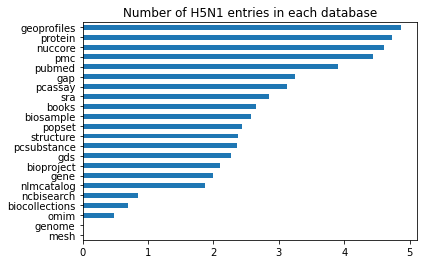

In [18]:
df = pd.DataFrame(data=data, index=index, dtype=float)  # note the cast into floats
df.sort_values(0, ascending=True, inplace=True)

_ = log10(df).plot(kind='barh', legend=False, logx=False, 
            title="Number of H5N1 entries in each database")